In [1]:
import pandas as pd
import datetime
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Sentitweets.csv")

In [3]:
def weekNumberFromDate(datee):
    datee = datetime.datetime.strptime(datee, "%Y-%m-%d")
    weekNumber = datetime.date(datee.year, datee.month, datee.day).isocalendar()[1]
    return weekNumber

In [4]:
def yearFromDate(datee):
    datee = datetime.datetime.strptime(datee, "%Y-%m-%d")
    return datee.year

In [5]:
df["Year"] = df["date"]

In [6]:
df = df.rename(columns={'date': 'Week'})

In [7]:
df["Week"] = df["Week"].apply(weekNumberFromDate)

In [8]:
df["Year"] = df["Year"].apply(yearFromDate)

In [9]:
df = df.drop(columns="tweet")

In [10]:
df = df.groupby(['Week', 'Year'], as_index=False)['Sentiments'].mean()

In [11]:
df

,Week,Year,Sentiments
0,1,2012,0.0
1,1,2014,0.0
2,1,2016,1.0
3,1,2017,-1.0
4,1,2019,-1.0
...,...,...,...
268,52,2014,1.0
269,52,2018,0.0
270,52,2019,0.5
271,52,2020,0.0


In [12]:
rf = pd.read_csv("Ratio_Final.csv")

In [13]:
rf

,Date,Cash Reserve Ratio,Statutory Liquidity Ratio,Policy Repo Rate,Reverse Repo Rate,Marginal Standing Facility (MSF) Rate,Bank Rate,Call Money Rate (Weighted Average),910Day Treasury Bill (Primary) Yield,INR0US$ Spot Rate ( Rs. Per Foreign Currency),INR0Euro Spot Rate ( Rs. Per Foreign Currency),Forward Premia of US$ 10month,Forward Premia of US$ 30month
0,2011-04-01,6.0,24.0,6.75,5.75,0.00,6.00,7.60,0.00,0.00,0.00,0.00,0.00
1,2011-04-08,6.0,24.0,6.75,5.75,0.00,6.00,6.22,0.00,0.00,0.00,0.00,0.00
2,2011-04-15,6.0,24.0,6.75,5.75,0.00,6.00,6.77,0.00,0.00,0.00,0.00,0.00
3,2011-04-22,6.0,24.0,6.75,5.75,0.00,6.00,6.40,0.00,0.00,0.00,0.00,0.00
4,2011-04-29,6.0,24.0,6.75,5.75,0.00,6.00,6.87,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-05-28,4.0,18.0,4.00,3.35,4.25,4.25,3.18,3.40,72.48,88.23,5.46,5.63
486,2021-06-04,4.0,18.0,4.00,3.35,4.25,4.25,3.13,3.41,73.03,88.45,3.62,4.08
487,2021-06-11,4.0,18.0,4.00,3.35,4.25,4.25,3.11,3.40,72.98,88.98,4.19,4.30
488,2021-06-18,4.0,18.0,4.00,3.35,4.25,4.25,3.16,3.47,74.14,88.26,3.97,4.15


In [14]:
rf["Year"] = rf["Date"]

In [15]:
rf["Week"] = rf["Date"]

In [16]:
rf["Week"] = rf["Week"].apply(weekNumberFromDate)

In [17]:
rf["Year"] = rf["Year"].apply(yearFromDate)

In [18]:
rf

,Date,Cash Reserve Ratio,Statutory Liquidity Ratio,Policy Repo Rate,Reverse Repo Rate,Marginal Standing Facility (MSF) Rate,Bank Rate,Call Money Rate (Weighted Average),910Day Treasury Bill (Primary) Yield,INR0US$ Spot Rate ( Rs. Per Foreign Currency),INR0Euro Spot Rate ( Rs. Per Foreign Currency),Forward Premia of US$ 10month,Forward Premia of US$ 30month,Year,Week
0,2011-04-01,6.0,24.0,6.75,5.75,0.00,6.00,7.60,0.00,0.00,0.00,0.00,0.00,2011,13
1,2011-04-08,6.0,24.0,6.75,5.75,0.00,6.00,6.22,0.00,0.00,0.00,0.00,0.00,2011,14
2,2011-04-15,6.0,24.0,6.75,5.75,0.00,6.00,6.77,0.00,0.00,0.00,0.00,0.00,2011,15
3,2011-04-22,6.0,24.0,6.75,5.75,0.00,6.00,6.40,0.00,0.00,0.00,0.00,0.00,2011,16
4,2011-04-29,6.0,24.0,6.75,5.75,0.00,6.00,6.87,0.00,0.00,0.00,0.00,0.00,2011,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-05-28,4.0,18.0,4.00,3.35,4.25,4.25,3.18,3.40,72.48,88.23,5.46,5.63,2021,21
486,2021-06-04,4.0,18.0,4.00,3.35,4.25,4.25,3.13,3.41,73.03,88.45,3.62,4.08,2021,22
487,2021-06-11,4.0,18.0,4.00,3.35,4.25,4.25,3.11,3.40,72.98,88.98,4.19,4.30,2021,23
488,2021-06-18,4.0,18.0,4.00,3.35,4.25,4.25,3.16,3.47,74.14,88.26,3.97,4.15,2021,24


In [19]:
new_df = rf.merge(df,  how='left')

In [20]:
new_df

,Date,Cash Reserve Ratio,Statutory Liquidity Ratio,Policy Repo Rate,Reverse Repo Rate,Marginal Standing Facility (MSF) Rate,Bank Rate,Call Money Rate (Weighted Average),910Day Treasury Bill (Primary) Yield,INR0US$ Spot Rate ( Rs. Per Foreign Currency),INR0Euro Spot Rate ( Rs. Per Foreign Currency),Forward Premia of US$ 10month,Forward Premia of US$ 30month,Year,Week,Sentiments
0,2011-04-01,6.0,24.0,6.75,5.75,0.00,6.00,7.60,0.00,0.00,0.00,0.00,0.00,2011,13,NaN
1,2011-04-08,6.0,24.0,6.75,5.75,0.00,6.00,6.22,0.00,0.00,0.00,0.00,0.00,2011,14,0.000000
2,2011-04-15,6.0,24.0,6.75,5.75,0.00,6.00,6.77,0.00,0.00,0.00,0.00,0.00,2011,15,NaN
3,2011-04-22,6.0,24.0,6.75,5.75,0.00,6.00,6.40,0.00,0.00,0.00,0.00,0.00,2011,16,NaN
4,2011-04-29,6.0,24.0,6.75,5.75,0.00,6.00,6.87,0.00,0.00,0.00,0.00,0.00,2011,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-05-28,4.0,18.0,4.00,3.35,4.25,4.25,3.18,3.40,72.48,88.23,5.46,5.63,2021,21,0.000000
486,2021-06-04,4.0,18.0,4.00,3.35,4.25,4.25,3.13,3.41,73.03,88.45,3.62,4.08,2021,22,0.133333
487,2021-06-11,4.0,18.0,4.00,3.35,4.25,4.25,3.11,3.40,72.98,88.98,4.19,4.30,2021,23,0.000000
488,2021-06-18,4.0,18.0,4.00,3.35,4.25,4.25,3.16,3.47,74.14,88.26,3.97,4.15,2021,24,NaN


In [21]:
new_df.isna().sum()

Date                                                0
Cash Reserve Ratio                                  0
Statutory Liquidity Ratio                           0
Policy Repo Rate                                    0
Reverse Repo Rate                                   0
Marginal Standing Facility (MSF) Rate               0
Bank Rate                                           0
Call Money Rate (Weighted Average)                  0
910Day Treasury Bill (Primary) Yield                0
INR0US$ Spot Rate ( Rs. Per Foreign Currency)       0
INR0Euro Spot Rate ( Rs. Per Foreign Currency)      0
Forward Premia of US$ 10month                       0
Forward Premia of US$ 30month                       0
Year                                                0
Week                                                0
Sentiments                                        245
dtype: int64

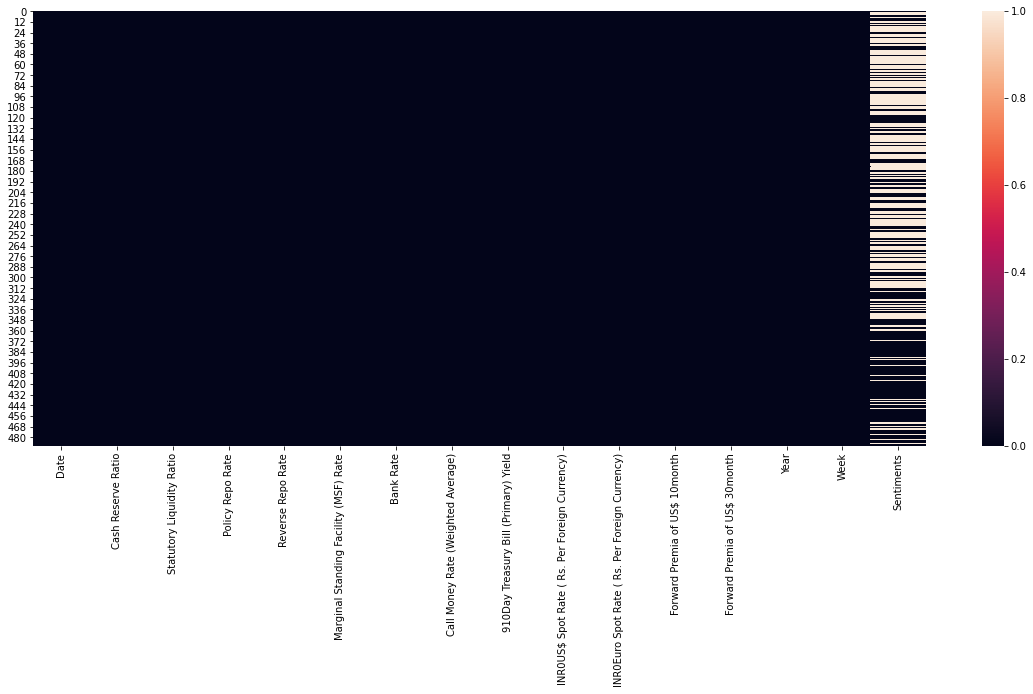

In [22]:
new_df_missing = new_df.isnull()
plt.figure(figsize=(20,8))
sns.heatmap(new_df_missing)

# Creating functions for imputing, handling NAs, null and empty values

 Function to impute missing values in a data frame

In [23]:
new_df_WithoutDate = new_df.drop(columns = "Date")

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df_WithoutDate = pd.DataFrame(scaler.fit_transform(new_df_WithoutDate), columns = new_df_WithoutDate.columns)
new_df_WithoutDate.head()

,Cash Reserve Ratio,Statutory Liquidity Ratio,Policy Repo Rate,Reverse Repo Rate,Marginal Standing Facility (MSF) Rate,Bank Rate,Call Money Rate (Weighted Average),910Day Treasury Bill (Primary) Yield,INR0US$ Spot Rate ( Rs. Per Foreign Currency),INR0Euro Spot Rate ( Rs. Per Foreign Currency),Forward Premia of US$ 10month,Forward Premia of US$ 30month,Year,Week,Sentiments
0,1.0,1.0,0.611111,0.578313,0.0,0.291667,0.619699,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,NaN
1,1.0,1.0,0.611111,0.578313,0.0,0.291667,0.430917,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.5
2,1.0,1.0,0.611111,0.578313,0.0,0.291667,0.506156,0.0,0.0,0.0,0.0,0.0,0.0,0.269231,NaN
3,1.0,1.0,0.611111,0.578313,0.0,0.291667,0.455540,0.0,0.0,0.0,0.0,0.0,0.0,0.288462,NaN
4,1.0,1.0,0.611111,0.578313,0.0,0.291667,0.519836,0.0,0.0,0.0,0.0,0.0,0.0,0.307692,NaN


In [25]:
imputer = KNNImputer(n_neighbors=5)
impute_df = pd.DataFrame(imputer.fit_transform(new_df_WithoutDate),columns = new_df_WithoutDate.columns)

In [26]:
impute_df

,Cash Reserve Ratio,Statutory Liquidity Ratio,Policy Repo Rate,Reverse Repo Rate,Marginal Standing Facility (MSF) Rate,Bank Rate,Call Money Rate (Weighted Average),910Day Treasury Bill (Primary) Yield,INR0US$ Spot Rate ( Rs. Per Foreign Currency),INR0Euro Spot Rate ( Rs. Per Foreign Currency),Forward Premia of US$ 10month,Forward Premia of US$ 30month,Year,Week,Sentiments
0,1.000000,1.0,0.611111,0.578313,0.000000,0.291667,0.619699,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.230769,0.600000
1,1.000000,1.0,0.611111,0.578313,0.000000,0.291667,0.430917,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.500000
2,1.000000,1.0,0.611111,0.578313,0.000000,0.291667,0.506156,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.269231,0.600000
3,1.000000,1.0,0.611111,0.578313,0.000000,0.291667,0.455540,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.288462,0.600000
4,1.000000,1.0,0.611111,0.578313,0.000000,0.291667,0.519836,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.307692,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.333333,0.0,0.000000,0.000000,0.414634,0.000000,0.015048,0.282862,0.946956,0.979354,0.491007,0.566969,1.0,0.384615,0.500000
486,0.333333,0.0,0.000000,0.000000,0.414634,0.000000,0.008208,0.283694,0.954142,0.981796,0.325540,0.410876,1.0,0.403846,0.566667
487,0.333333,0.0,0.000000,0.000000,0.414634,0.000000,0.005472,0.282862,0.953488,0.987679,0.376799,0.433031,1.0,0.423077,0.500000
488,0.333333,0.0,0.000000,0.000000,0.414634,0.000000,0.012312,0.288686,0.968644,0.979687,0.357014,0.417925,1.0,0.442308,0.646667


In [27]:
impute_df.isna().sum()

Cash Reserve Ratio                                0
Statutory Liquidity Ratio                         0
Policy Repo Rate                                  0
Reverse Repo Rate                                 0
Marginal Standing Facility (MSF) Rate             0
Bank Rate                                         0
Call Money Rate (Weighted Average)                0
910Day Treasury Bill (Primary) Yield              0
INR0US$ Spot Rate ( Rs. Per Foreign Currency)     0
INR0Euro Spot Rate ( Rs. Per Foreign Currency)    0
Forward Premia of US$ 10month                     0
Forward Premia of US$ 30month                     0
Year                                              0
Week                                              0
Sentiments                                        0
dtype: int64

In [28]:
nn_df = new_df

In [29]:
mlpnn = new_df

In [30]:
nn_df["Sentiments"]=impute_df["Sentiments"]

In [31]:
mlpnn["Sentiments"]=impute_df["Sentiments"]

In [32]:
nn_df.isna().sum()

Date                                              0
Cash Reserve Ratio                                0
Statutory Liquidity Ratio                         0
Policy Repo Rate                                  0
Reverse Repo Rate                                 0
Marginal Standing Facility (MSF) Rate             0
Bank Rate                                         0
Call Money Rate (Weighted Average)                0
910Day Treasury Bill (Primary) Yield              0
INR0US$ Spot Rate ( Rs. Per Foreign Currency)     0
INR0Euro Spot Rate ( Rs. Per Foreign Currency)    0
Forward Premia of US$ 10month                     0
Forward Premia of US$ 30month                     0
Year                                              0
Week                                              0
Sentiments                                        0
dtype: int64

# Novel NN

In [107]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
import numpy as np
import math
from tensorflow.keras.optimizers import SGD

In [34]:
nn_df

,Date,Cash Reserve Ratio,Statutory Liquidity Ratio,Policy Repo Rate,Reverse Repo Rate,Marginal Standing Facility (MSF) Rate,Bank Rate,Call Money Rate (Weighted Average),910Day Treasury Bill (Primary) Yield,INR0US$ Spot Rate ( Rs. Per Foreign Currency),INR0Euro Spot Rate ( Rs. Per Foreign Currency),Forward Premia of US$ 10month,Forward Premia of US$ 30month,Year,Week,Sentiments
0,2011-04-01,6.0,24.0,6.75,5.75,0.00,6.00,7.60,0.00,0.00,0.00,0.00,0.00,2011,13,0.600000
1,2011-04-08,6.0,24.0,6.75,5.75,0.00,6.00,6.22,0.00,0.00,0.00,0.00,0.00,2011,14,0.500000
2,2011-04-15,6.0,24.0,6.75,5.75,0.00,6.00,6.77,0.00,0.00,0.00,0.00,0.00,2011,15,0.600000
3,2011-04-22,6.0,24.0,6.75,5.75,0.00,6.00,6.40,0.00,0.00,0.00,0.00,0.00,2011,16,0.600000
4,2011-04-29,6.0,24.0,6.75,5.75,0.00,6.00,6.87,0.00,0.00,0.00,0.00,0.00,2011,17,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-05-28,4.0,18.0,4.00,3.35,4.25,4.25,3.18,3.40,72.48,88.23,5.46,5.63,2021,21,0.500000
486,2021-06-04,4.0,18.0,4.00,3.35,4.25,4.25,3.13,3.41,73.03,88.45,3.62,4.08,2021,22,0.566667
487,2021-06-11,4.0,18.0,4.00,3.35,4.25,4.25,3.11,3.40,72.98,88.98,4.19,4.30,2021,23,0.500000
488,2021-06-18,4.0,18.0,4.00,3.35,4.25,4.25,3.16,3.47,74.14,88.26,3.97,4.15,2021,24,0.646667


In [35]:
ybn = np.array(nn_df[["Policy Repo Rate"]])

In [36]:
nn_df.drop(nn_df.columns[[0,3,13,14]],axis=1,inplace=True)

In [37]:
xbn = nn_df.to_numpy()

In [38]:
xbn


array([[ 6.        , 24.        ,  5.75      , ...,  0.        ,
         0.        ,  0.6       ],
       [ 6.        , 24.        ,  5.75      , ...,  0.        ,
         0.        ,  0.5       ],
       [ 6.        , 24.        ,  5.75      , ...,  0.        ,
         0.        ,  0.6       ],
       ...,
       [ 4.        , 18.        ,  3.35      , ...,  4.19      ,
         4.3       ,  0.5       ],
       [ 4.        , 18.        ,  3.35      , ...,  3.97      ,
         4.15      ,  0.64666667],
       [ 4.        , 18.        ,  3.35      , ...,  3.8       ,
         3.99      ,  1.        ]])

In [39]:
x1 = StandardScaler().fit_transform(xbn)
y1 = StandardScaler().fit_transform(ybn.reshape(len(ybn),1))[:,0]

In [40]:
n_train = 450
trainX, testX = x1[:n_train, :], x1[n_train:, :]
trainy, testy = y1[:n_train], y1[n_train:]

In [41]:
trainX.shape

(450, 12)

In [239]:
model = Sequential()
model.add(Dense(25, input_dim=12, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

In [240]:
opt = SGD(learning_rate=0.01,momentum=0.9)

In [241]:
model.compile(loss='mean_squared_error', optimizer=opt)

In [242]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train mse: %.5f, Test mse: %.5f' % (train_mse, test_mse))

Train mse: 0.00365, Test mse: 0.00501


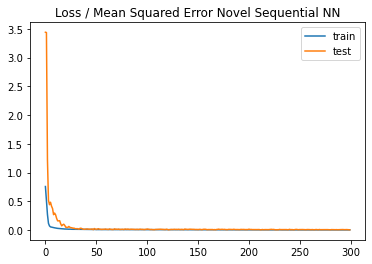

In [243]:
pyplot.title('Loss / Mean Squared Error Novel Sequential NN')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [157]:
model1 = Sequential()
model1.add(Dense(25, input_dim=12, activation='sigmoid', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='sigmoid'))
model1.add(Dense(1, activation='linear'))

In [158]:
model1.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

In [159]:
history1 = model1.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_mae = model1.evaluate(trainX, trainy, verbose=0)
_, test_mae = model1.evaluate(testX, testy, verbose=0)
print('Train mae: %.5f, Test mae: %.5f' % (train_mae, test_mae))

Train mae: 0.01623, Test mae: 0.04384


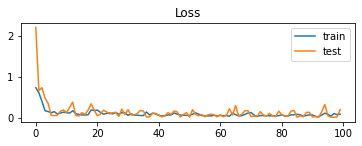

In [160]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()


In [183]:
model2 = Sequential()
model2.add(Dense(25, input_dim=12, activation='sigmoid', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='sigmoid'))
model2.add(Dense(1, activation='linear'))

In [222]:
opt2 = SGD(learning_rate=0.01,momentum=0.9)

In [223]:
model2.compile(loss='mse', optimizer=opt2, metrics=['mse', 'mae', 'mape'])

In [224]:
history2 = model2.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)

In [225]:
MAPEvalue = history2.history['mape']

In [226]:
MAPEvalue[-1]

4.795917987823486

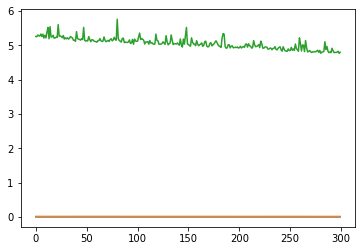

In [227]:
pyplot.plot(history2.history['mse'])
pyplot.plot(history2.history['mae'])
pyplot.plot(history2.history['mape'])
pyplot.show()

In [274]:
print('The Root Mean Square Error for Novel approach sequential NN model is {:.2f}'.format(math.sqrt(test_mse)))
print('The Mean Absolute Error for Novel approach sequential NN model is {:.2f}'.format(test_mae))
print('The Mean Absolute Percentage Error for Novel sequential approach NN model is {:.2f}%'.format(MAPEvalue[-1]))

The Root Mean Square Error for Novel approach sequential NN model is 0.07
The Mean Absolute Error for Novel approach sequential NN model is 0.04
The Mean Absolute Percentage Error for Novel sequential approach NN model is 4.80%


# Novel MLP

In [245]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

In [246]:
y = rf["Policy Repo Rate"]

In [247]:
X = mlpnn

In [248]:
X

,Cash Reserve Ratio,Statutory Liquidity Ratio,Reverse Repo Rate,Marginal Standing Facility (MSF) Rate,Bank Rate,Call Money Rate (Weighted Average),910Day Treasury Bill (Primary) Yield,INR0US$ Spot Rate ( Rs. Per Foreign Currency),INR0Euro Spot Rate ( Rs. Per Foreign Currency),Forward Premia of US$ 10month,Forward Premia of US$ 30month,Sentiments
0,6.0,24.0,5.75,0.00,6.00,7.60,0.00,0.00,0.00,0.00,0.00,0.600000
1,6.0,24.0,5.75,0.00,6.00,6.22,0.00,0.00,0.00,0.00,0.00,0.500000
2,6.0,24.0,5.75,0.00,6.00,6.77,0.00,0.00,0.00,0.00,0.00,0.600000
3,6.0,24.0,5.75,0.00,6.00,6.40,0.00,0.00,0.00,0.00,0.00,0.600000
4,6.0,24.0,5.75,0.00,6.00,6.87,0.00,0.00,0.00,0.00,0.00,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
485,4.0,18.0,3.35,4.25,4.25,3.18,3.40,72.48,88.23,5.46,5.63,0.500000
486,4.0,18.0,3.35,4.25,4.25,3.13,3.41,73.03,88.45,3.62,4.08,0.566667
487,4.0,18.0,3.35,4.25,4.25,3.11,3.40,72.98,88.98,4.19,4.30,0.500000
488,4.0,18.0,3.35,4.25,4.25,3.16,3.47,74.14,88.26,3.97,4.15,0.646667


In [249]:
X_trainmlp, X_testmlp, y_trainmlp, y_testmlp = train_test_split(X, y,random_state=1, test_size=0.2)

In [250]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_trainmlp)
X_testscaled=sc_X.transform(X_testmlp)

In [270]:
reg = MLPRegressor(hidden_layer_sizes=(128,64,32,16),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_trainmlp)

In [271]:
y_predmlp=reg.predict(X_testscaled)

In [272]:
r2_score(y_predmlp, y_testmlp)

0.9847395592137924

In [273]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
msemlp = mean_squared_error(y_predmlp,y_testmlp)
rmsemlp = math.sqrt(msemlp)
maemlp = mean_absolute_error(y_predmlp,y_testmlp)
MAPEmlp = np.mean(np.abs((y_testmlp - y_predmlp) / y_predmlp)) * 100
print('The Root Mean Square Error is for novel MLP model is {:.2f}'.format(rmsemlp))
print('The Mean Absolute Error is for novel MLP model is {:.2f}'.format(maemlp))
print('The Mean Absolute Percentage Error is for novel MLP model is {:.2f}%'.format(MAPEmlp))

The Root Mean Square Error is for novel MLP model is 0.16
The Mean Absolute Error is for novel MLP model is 0.11
The Mean Absolute Percentage Error is for novel MLP model is 1.76%


In [275]:
tempval = np.array(y_testmlp)

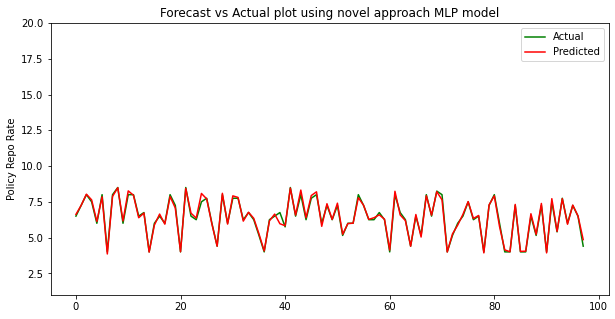

In [276]:
plt.figure(figsize=(10,5))
plt.title('Forecast vs Actual plot using novel approach MLP model')
plt.plot(tempval , label = 'Actual', color = 'g')
plt.plot(y_predmlp , label = 'Predicted', color = 'r')
plt.ylim([1, 20])
plt.ylabel("Policy Repo Rate")
plt.legend()